In [1]:
#Import all packages
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [2]:
#Load the data set into Pandas
df = pd.read_csv('churn_prepared.csv', index_col = 0)
df.describe()

,Children,Age,Income,Outage_sec_perweek,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,TimelyResponse,...,Contract_num,InternetService_num,Phone_num,Multiple_num,OnlineSecurity_num,OnlineBackup_num,DeviceProtection_num,TechSupport_num,StreamingTV_num,StreamingMovies_num
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,10.001848,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,...,0.698600,1.227900,0.906700,0.460800,0.357600,0.450600,0.438600,0.375000,0.492900,0.489000
std,2.1472,20.698882,28199.916702,2.976019,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,...,0.836079,0.775772,0.290867,0.498486,0.479317,0.497579,0.496241,0.484147,0.499975,0.499904
min,0.0000,18.000000,348.670000,0.099747,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0000,35.000000,19224.717500,8.018214,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0000,53.000000,33170.605000,10.018560,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.0000,71.000000,53246.170000,11.969485,2.000000,1.000000,61.479795,200.734725,5586.141370,4.000000,...,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10.0000,89.000000,258900.700000,21.207230,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
#Set up for train - test split
X = df.drop('Churn_num', axis = 1).values
y = df['Churn_num'].values

In [4]:
#Split the data set with an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 25)

In [5]:
#Save the training and testing sets as csv files
pd.DataFrame(X_train).to_csv('X_train.csv')
pd.DataFrame(X_test).to_csv('X_test.csv')
pd.DataFrame(y_train).to_csv('y_train.csv')
pd.DataFrame(y_test).to_csv('y_test.csv')

In [6]:
#Run gridsearch cv to find best number of k
param_grid = {'n_neighbors': np.arange(1, 30)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid)
knn_cv.fit(X_train, y_train)
print('The best parameters for this model: {}'.format(knn_cv.best_params_))

The best parameters for this model: {'n_neighbors': 20}


In [7]:
#Fit the KNN model using grid search result of k = 20
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_pred_prob = knn.predict_proba(X_test)[:,1]

In [8]:
#Print accuracy and AUC
print("The accuracy of the model is: ", knn.score(X_test, y_test))
print("The area under the curve (AUC) is: ", roc_auc_score(y_test, y_pred_prob))

The accuracy of the model is:  0.722
The area under the curve (AUC) is:  0.7673541460479733


In [9]:
#Print confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[1270  187]
 [ 369  174]]


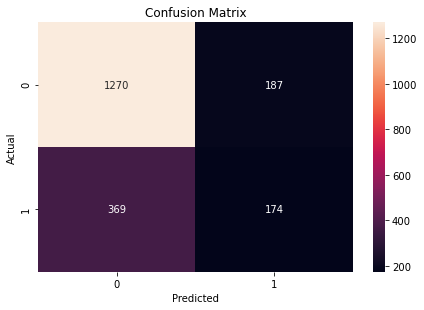

In [10]:
#Use seaborn heatmap to visualize the confusion matrix
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, fmt = 'g')
plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('matrix1.jpg')